In [1]:
import numpy
import pandas

In [2]:
all_df = pandas.read_csv("all_interpolated.csv.gz")

In [3]:
all_df.head()

,x_position,y_position,z_position,r_record,g_record,b_record,shpID,shpIX,dap
0,-3.000000,-2.44,754.300528,35025.162381,33504.094577,33282.496769,EL19_5098-1-19,18,36.0
1,-2.837838,-2.44,754.333563,32327.390835,31561.644047,30923.573239,EL19_5098-1-19,18,36.0
2,-2.675676,-2.44,754.368385,43458.396474,42268.669710,42079.945688,EL19_5098-1-19,18,36.0
3,-2.513514,-2.44,754.403207,43922.821752,43229.006309,42873.437901,EL19_5098-1-19,18,36.0
4,-2.351351,-2.44,754.438029,45340.600290,44765.812362,45396.340861,EL19_5098-1-19,18,36.0


In [4]:
all_df.sort_values(by=['shpID','dap','y_position','x_position'], inplace=True)

In [8]:
mask = all_df['shpID'].str.contains("fill")

In [10]:
all_df = all_df.loc[~mask,:]

In [11]:
all_raw_mat = numpy.empty((len(all_df),3), dtype='float64')
all_raw_mat[:,0] = all_df['z_position'].values
all_raw_mat[:,1] = all_df['g_record'].values - all_df['r_record'].values
all_raw_mat[:,2] = all_df['b_record'].values

In [16]:
all_mat = numpy.empty((len(all_raw_mat)//7904, 23712), dtype='float64')

In [18]:
stix = numpy.arange(0,len(all_raw_mat), 7904)
spix = stix + 7904

In [19]:
for i,(st,sp) in enumerate(zip(stix, spix)):
    all_mat[i,0:7904] = all_raw_mat[st:sp,0]
    all_mat[i,7904:15808] = all_raw_mat[st:sp,1]
    all_mat[i,15808:23712] = all_raw_mat[st:sp,2]

In [21]:
all_mat.shape

(1524, 23712)

In [22]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA()
model = pca.fit(all_mat)

In [79]:
print(pca.explained_variance_ratio_)

[4.34510129e-02 1.73045785e-02 1.16241483e-02 ... 1.80262712e-04
 1.57288532e-04 3.00449982e-30]


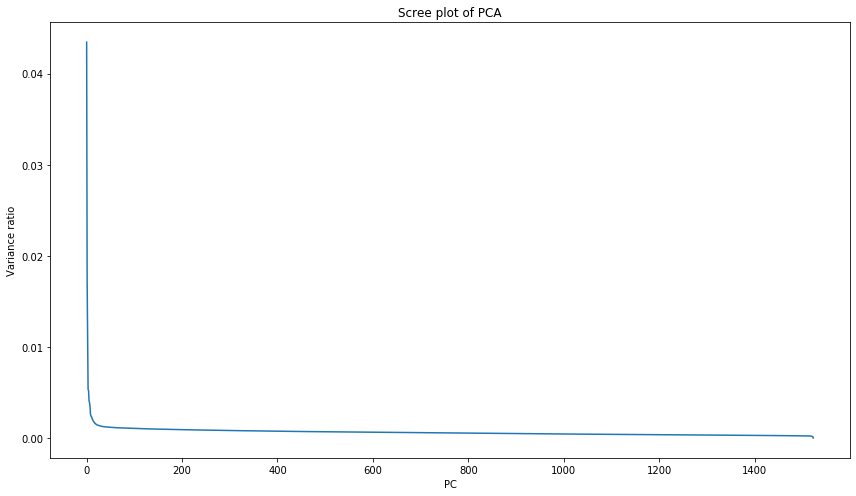

In [94]:
pyplot.figure(figsize=(12,7))

pyplot.plot(pca.explained_variance_ratio_)
pyplot.title("Scree plot of PCA")
pyplot.xlabel("PC")
pyplot.ylabel("Variance ratio")
pyplot.tight_layout()

pyplot.savefig("canopy_PCA_scree.png", dpi=400)

In [29]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from shapely.geometry.polygon import Polygon

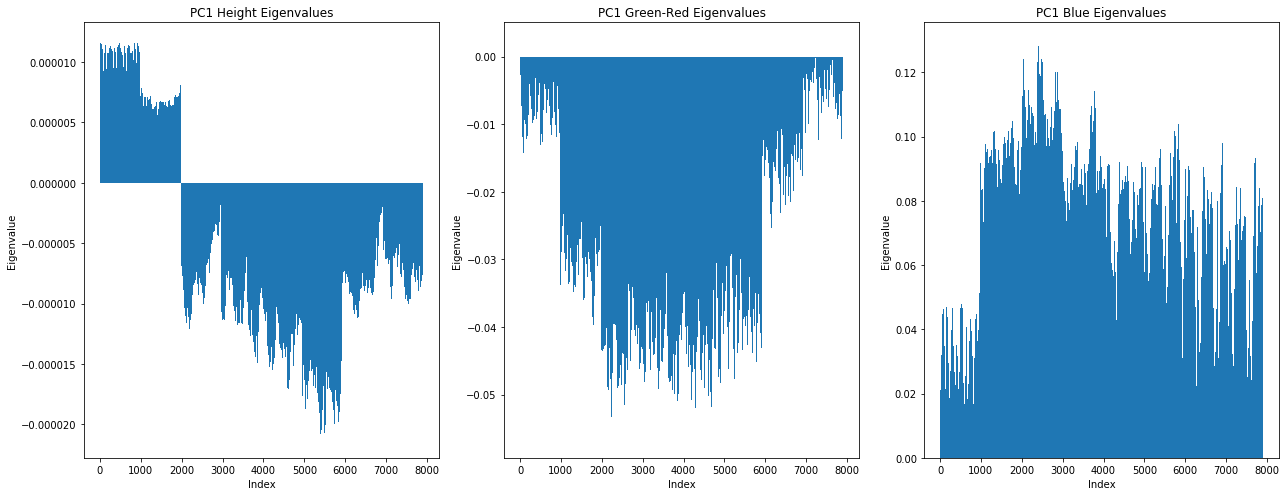

In [95]:
x_axis = numpy.arange(7904)

fig = pyplot.figure(figsize=(18,7))

ax = fig.add_subplot(131)
ax.hist(x_axis, weights=pca.components_[0,0:7904], bins=1000)
ax.set_xlabel("Index")
ax.set_ylabel("Eigenvalue")
ax.set_title("PC1 Height Eigenvalues")

ax = fig.add_subplot(132)
ax.hist(x_axis, weights=pca.components_[0,7904:15808], bins=1000)
ax.set_xlabel("Index")
ax.set_ylabel("Eigenvalue")
ax.set_title("PC1 Green-Red Eigenvalues")

ax = fig.add_subplot(133)
ax.hist(x_axis, weights=pca.components_[0,15808:23712], bins=1000)
ax.set_xlabel("Index")
ax.set_ylabel("Eigenvalue")
ax.set_title("PC1 Blue Eigenvalues")

pyplot.tight_layout()

pyplot.savefig("canopy_PCA_eigenvalues_PC1.png", dpi = 400)

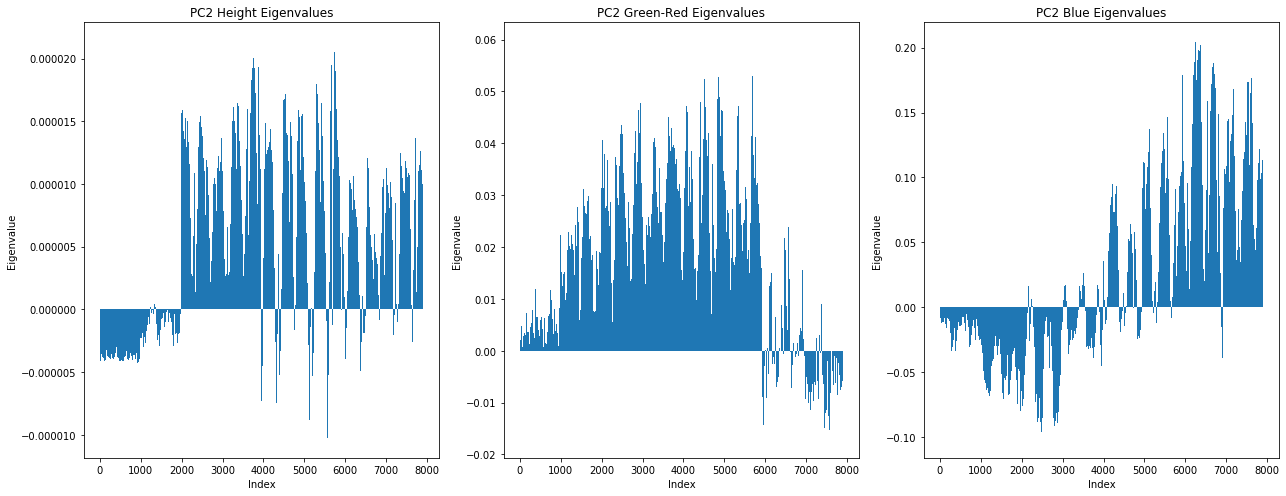

In [96]:
fig = pyplot.figure(figsize=(18,7))

ax = fig.add_subplot(131)
ax.hist(x_axis, weights=pca.components_[1,0:7904], bins=1000)
ax.set_xlabel("Index")
ax.set_ylabel("Eigenvalue")
ax.set_title("PC2 Height Eigenvalues")

ax = fig.add_subplot(132)
ax.hist(x_axis, weights=pca.components_[1,7904:15808], bins=1000)
ax.set_xlabel("Index")
ax.set_ylabel("Eigenvalue")
ax.set_title("PC2 Green-Red Eigenvalues")

ax = fig.add_subplot(133)
ax.hist(x_axis, weights=pca.components_[1,15808:23712], bins=1000)
ax.set_xlabel("Index")
ax.set_ylabel("Eigenvalue")
ax.set_title("PC2 Blue Eigenvalues")

pyplot.tight_layout()

pyplot.savefig("canopy_PCA_eigenvalues_PC2.png", dpi = 400)

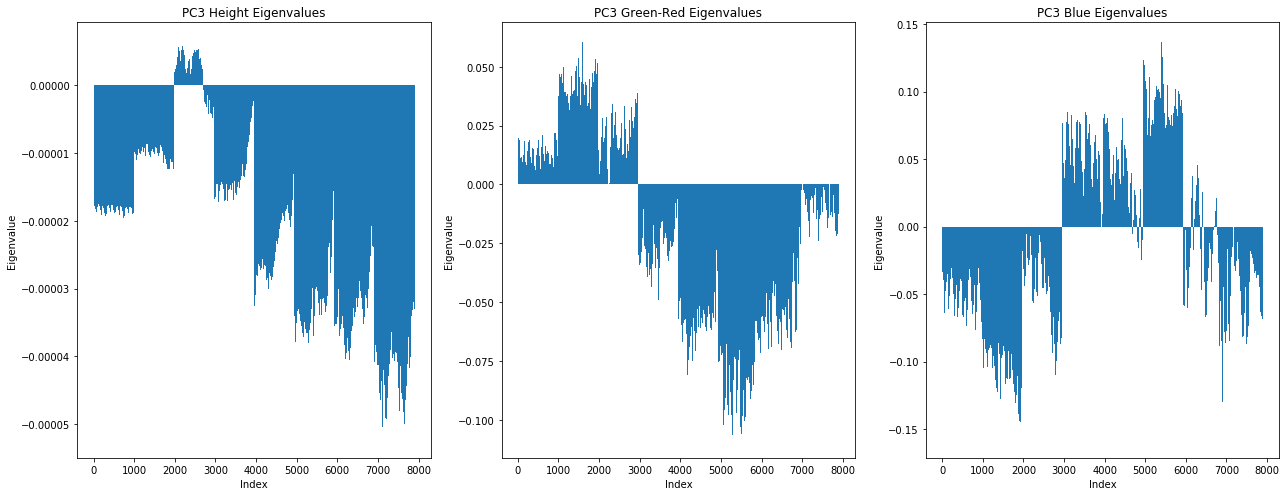

In [97]:
fig = pyplot.figure(figsize=(18,7))

ax = fig.add_subplot(131)
ax.hist(x_axis, weights=pca.components_[2,0:7904], bins=1000)
ax.set_xlabel("Index")
ax.set_ylabel("Eigenvalue")
ax.set_title("PC3 Height Eigenvalues")

ax = fig.add_subplot(132)
ax.hist(x_axis, weights=pca.components_[2,7904:15808], bins=1000)
ax.set_xlabel("Index")
ax.set_ylabel("Eigenvalue")
ax.set_title("PC3 Green-Red Eigenvalues")

ax = fig.add_subplot(133)
ax.hist(x_axis, weights=pca.components_[2,15808:23712], bins=1000)
ax.set_xlabel("Index")
ax.set_ylabel("Eigenvalue")
ax.set_title("PC3 Blue Eigenvalues")

pyplot.tight_layout()

pyplot.savefig("canopy_PCA_eigenvalues_PC3.png", dpi = 400)

In [84]:
proj = model.transform(all_mat)

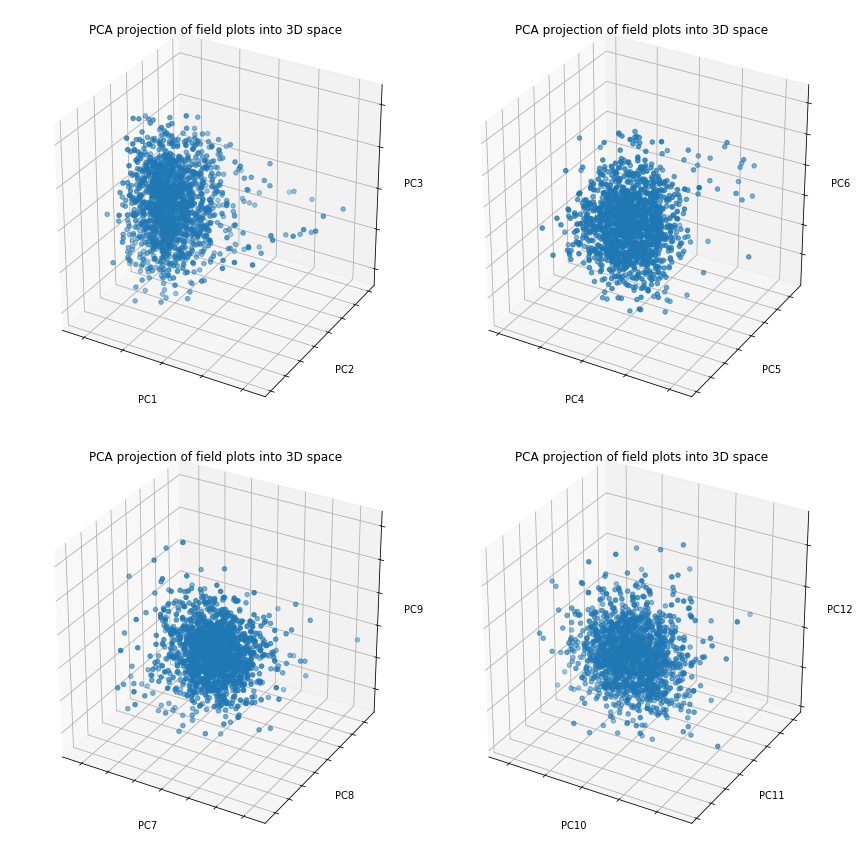

In [98]:
fig = pyplot.figure(figsize=(12,12))

ax = fig.add_subplot(221, projection='3d')
ax.scatter(proj[:,0], proj[:,1], proj[:,2])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA projection of field plots into 3D space")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax = fig.add_subplot(222, projection='3d')
ax.scatter(proj[:,3], proj[:,4], proj[:,5])
ax.set_xlabel("PC4")
ax.set_ylabel("PC5")
ax.set_zlabel("PC6")
ax.set_title("PCA projection of field plots into 3D space")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax = fig.add_subplot(223, projection='3d')
ax.scatter(proj[:,6], proj[:,7], proj[:,8])
ax.set_xlabel("PC7")
ax.set_ylabel("PC8")
ax.set_zlabel("PC9")
ax.set_title("PCA projection of field plots into 3D space")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax = fig.add_subplot(224, projection='3d')
ax.scatter(proj[:,9], proj[:,10], proj[:,11])
ax.set_xlabel("PC10")
ax.set_ylabel("PC11")
ax.set_zlabel("PC12")
ax.set_title("PCA projection of field plots into 3D space")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

pyplot.tight_layout()

pyplot.savefig("canopy_PCA.png", dpi = 400)

In [85]:
proj.shape

(1524, 1524)

In [87]:
proj

array([[ 4.91757145e+04, -1.96629027e+05, -1.85396173e+05, ...,
         7.15397947e+02, -1.30089067e+04,  2.40169152e-09],
       [-3.40994731e+05, -3.11415911e+05, -8.02298086e+04, ...,
        -1.05669938e+04, -2.39587307e+03,  2.35381231e-09],
       [ 9.27043168e+04, -1.62038287e+05, -2.23497554e+05, ...,
         1.07917925e+04,  1.40042804e+03,  2.49260131e-09],
       ...,
       [-1.76991560e+05, -2.51173058e+05,  1.41113410e+05, ...,
         6.51932757e+03,  1.56834290e+04,  2.40012514e-09],
       [ 1.09201623e+05, -1.36117044e+05,  1.85850057e+04, ...,
         3.53777281e+01,  4.92702322e+03,  2.35962637e-09],
       [-5.59472728e+04, -1.00258296e+05,  6.68557928e+03, ...,
        -2.29824534e+03, -7.85491288e+03,  2.38934670e-09]])

In [86]:
pca.components_.shape

(1524, 23712)